In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 100)

In [ ]:
gdf_agencias_sp = pd.read_csv('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/agencias_latlong.csv', sep=';')

In [2]:
df = pd.concat(map(pd.read_csv, ['C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_1.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_2.csv','C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_3.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_4.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_5.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_6.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_7.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_8.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_9.csv', 'C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/simulations_results/result_sim_6_10.csv']))

In [3]:
df

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito
0,simulacao_6_1,70923,2725,0.038422,JOSE BONIFACIO,47
1,simulacao_6_1,148795,24513,0.164743,JD SAO LUIS,46
2,simulacao_6_1,53289,9598,0.180112,ARTUR ALVIM,5
3,simulacao_6_1,12937,3917,0.302775,JAGUARA,40
4,simulacao_6_1,57243,27224,0.475587,VILA PRUDENTE,93
...,...,...,...,...,...,...
91,simulacao_6_10,58141,22790,0.391978,VILA MARIA,89
92,simulacao_6_10,76056,59058,0.776507,VILA MARIANA,90
93,simulacao_6_10,56905,18013,0.316545,VILA MATILDE,91
94,simulacao_6_10,49577,47817,0.964500,SANTA CECILIA,69


In [16]:
df['perc_atendimento_multiplicado'] = df['perc_atendimento'] * 100

In [20]:
df[df['nome_distrito'] == "REPUBLICA"]

,simulacao,pop_total,pop_buffer,perc_atendimento,nome_distrito,cod_distrito,perc_atendimento_multiplicado
95,simulacao_6_1,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_2,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_3,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_4,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_5,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_6,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_7,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_8,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_9,34609,34609,1.0,REPUBLICA,66,100.0
95,simulacao_6_10,34609,34609,1.0,REPUBLICA,66,100.0


<AxesSubplot:xlabel='simulacao', ylabel='nome_distrito'>

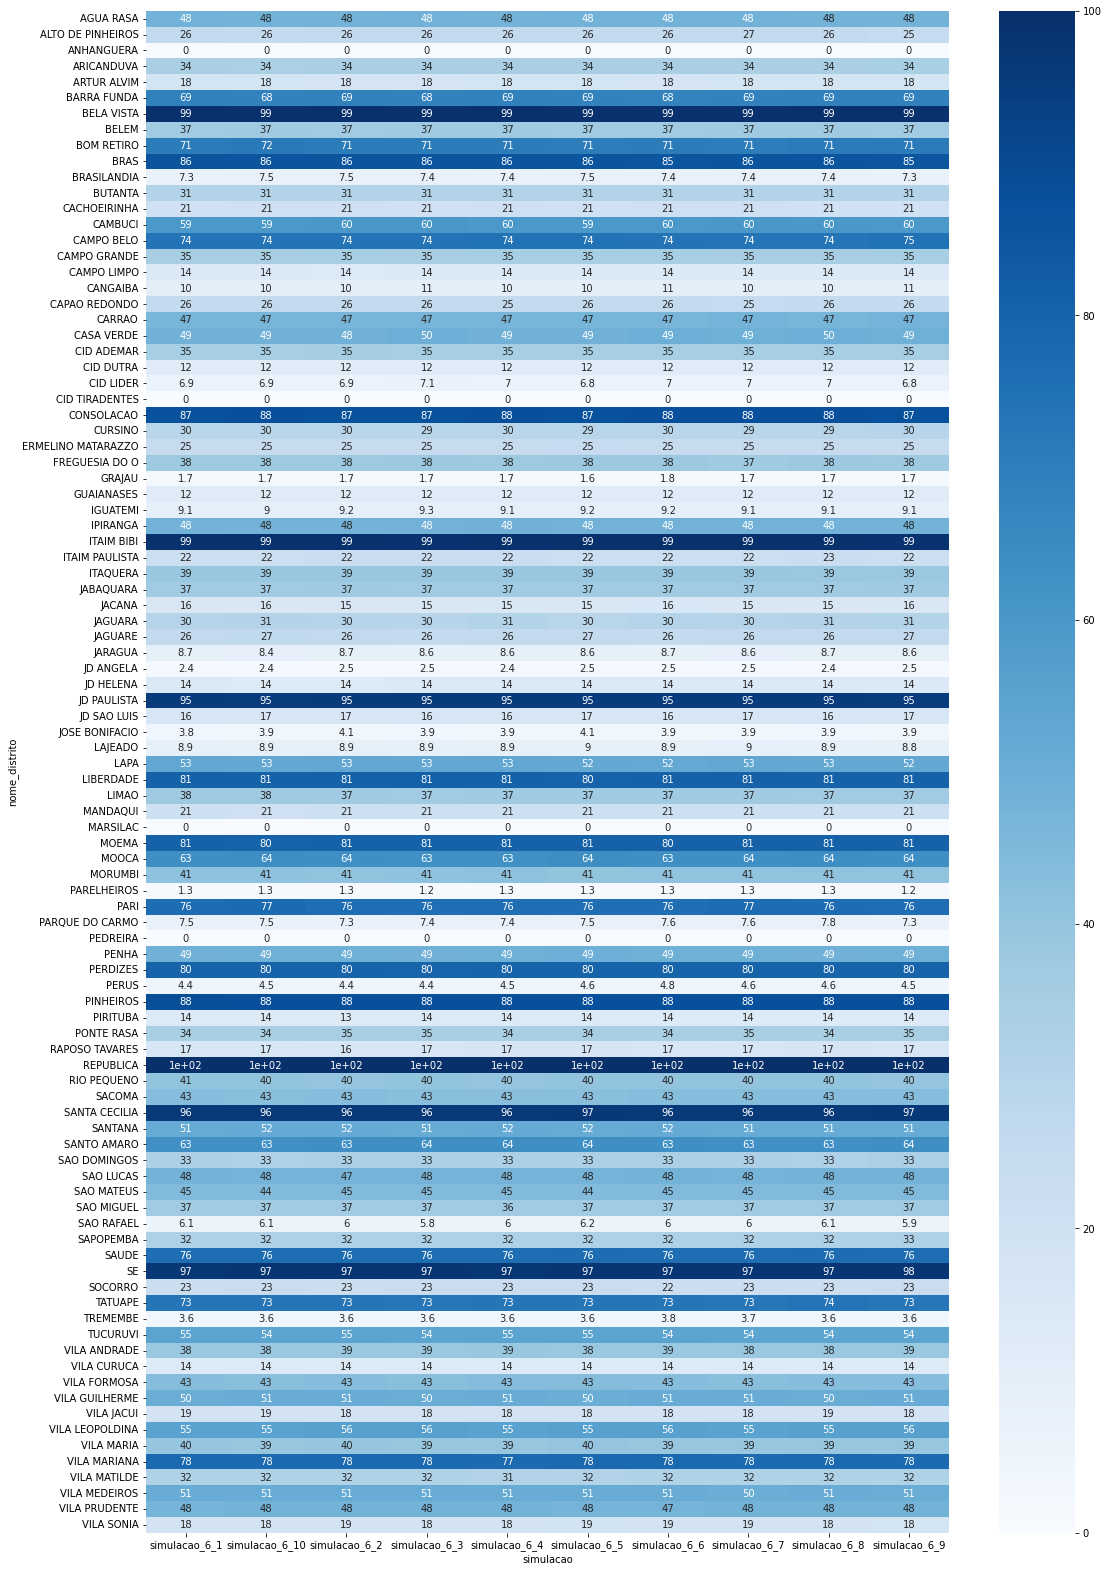

In [19]:
heatmap = df[['simulacao', 'perc_atendimento_multiplicado', 'nome_distrito']].pivot(index='nome_distrito', columns='simulacao')['perc_atendimento_multiplicado']
fig,ax = plt.subplots(1,1,figsize=(18,28))
sns.heatmap(heatmap, cmap="Blues", annot=True, ax=ax)

In [5]:
df_agg_sd = df.groupby(['cod_distrito', 'nome_distrito']).agg({'perc_atendimento':'std'}) \
                          .reset_index()

In [49]:
df_agg_sd

,cod_distrito,nome_distrito,perc_atendimento
0,1,AGUA RASA,0.001737
1,2,ALTO DE PINHEIROS,0.003445
2,3,ANHANGUERA,0.000000
3,4,ARICANDUVA,0.001476
4,5,ARTUR ALVIM,0.001768
5,6,BARRA FUNDA,0.002706
6,7,BELA VISTA,0.000270
7,8,BELEM,0.002518
8,9,BOM RETIRO,0.003147
9,10,BRAS,0.001844


In [6]:
df_agg = df.groupby(['cod_distrito', 'nome_distrito']).agg({'perc_atendimento':'mean'}) \
                          .reset_index()

In [7]:
df_agg

,cod_distrito,nome_distrito,perc_atendimento
0,1,AGUA RASA,0.480838
1,2,ALTO DE PINHEIROS,0.260274
2,3,ANHANGUERA,0.000000
3,4,ARICANDUVA,0.337657
4,5,ARTUR ALVIM,0.180037
5,6,BARRA FUNDA,0.686789
6,7,BELA VISTA,0.992513
7,8,BELEM,0.371468
8,9,BOM RETIRO,0.709561
9,10,BRAS,0.856252


In [8]:
sp_shp = gpd.read_file('C:/Users/Ricardo/Documents/R-Projetos/Exploratory-Data-Analysis-Bancarization/data/processed/sp_pop_shp/sp_pop_shp.shp')

In [9]:
sp_shp_agg = sp_shp.merge(df_agg, how='left',left_on='COD_DIST', right_on='cod_distrito')

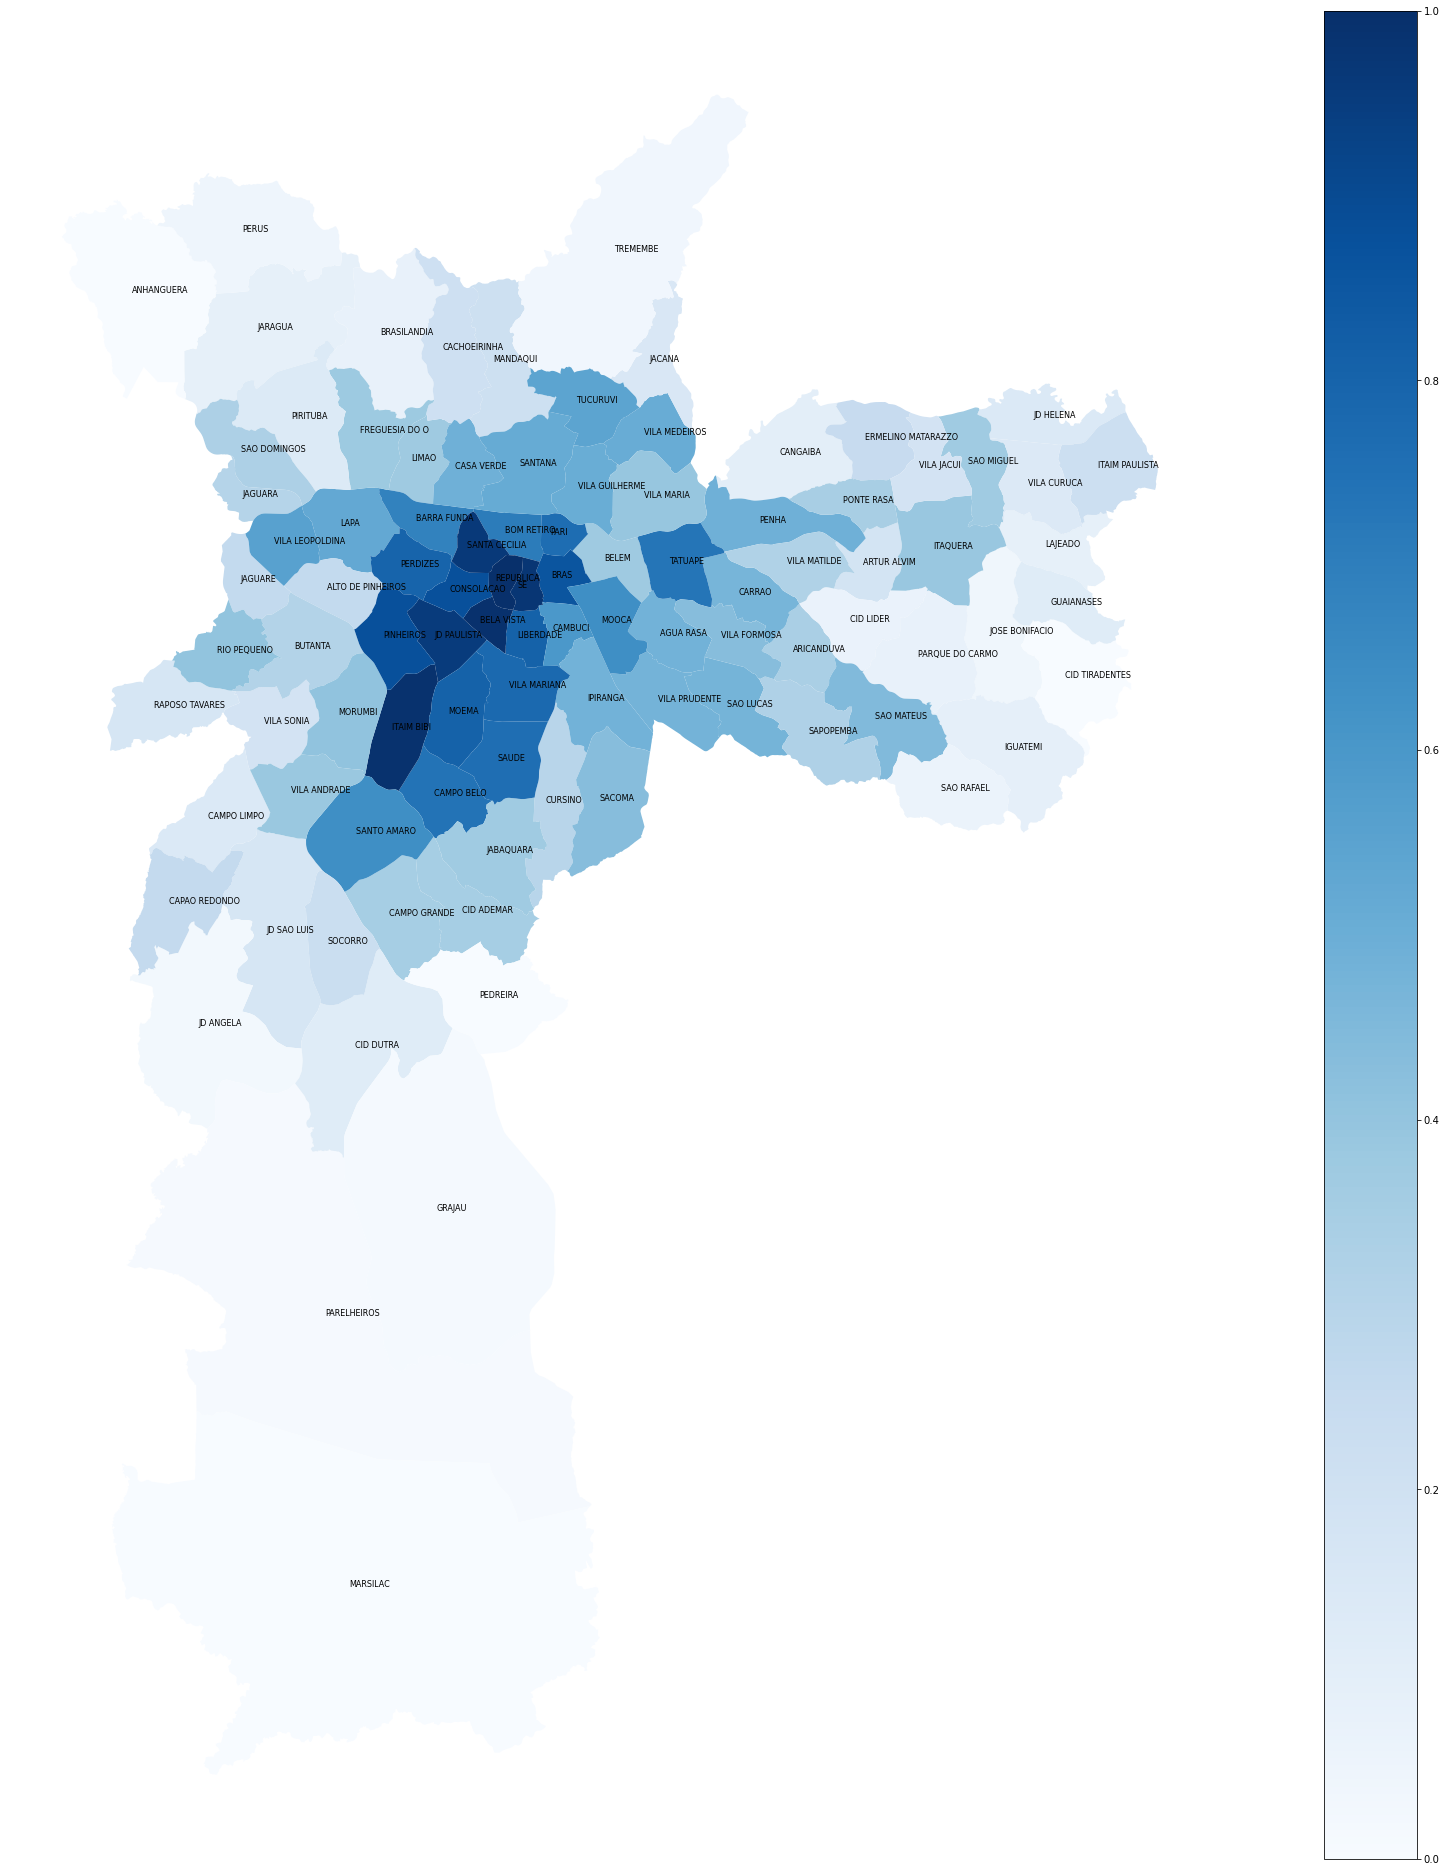

In [10]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('white')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Blues", legend=True, ax=ax)

# Add district name
for x, y, label in zip(sp_shp_agg.centroid.x, sp_shp_agg.centroid.y, sp_shp_agg.nome_distrito):
  ax.annotate(label, xy=(x, y), xytext=(-10, 0), textcoords="offset points", fontsize=8)

ax.axis("off")
plt.show()

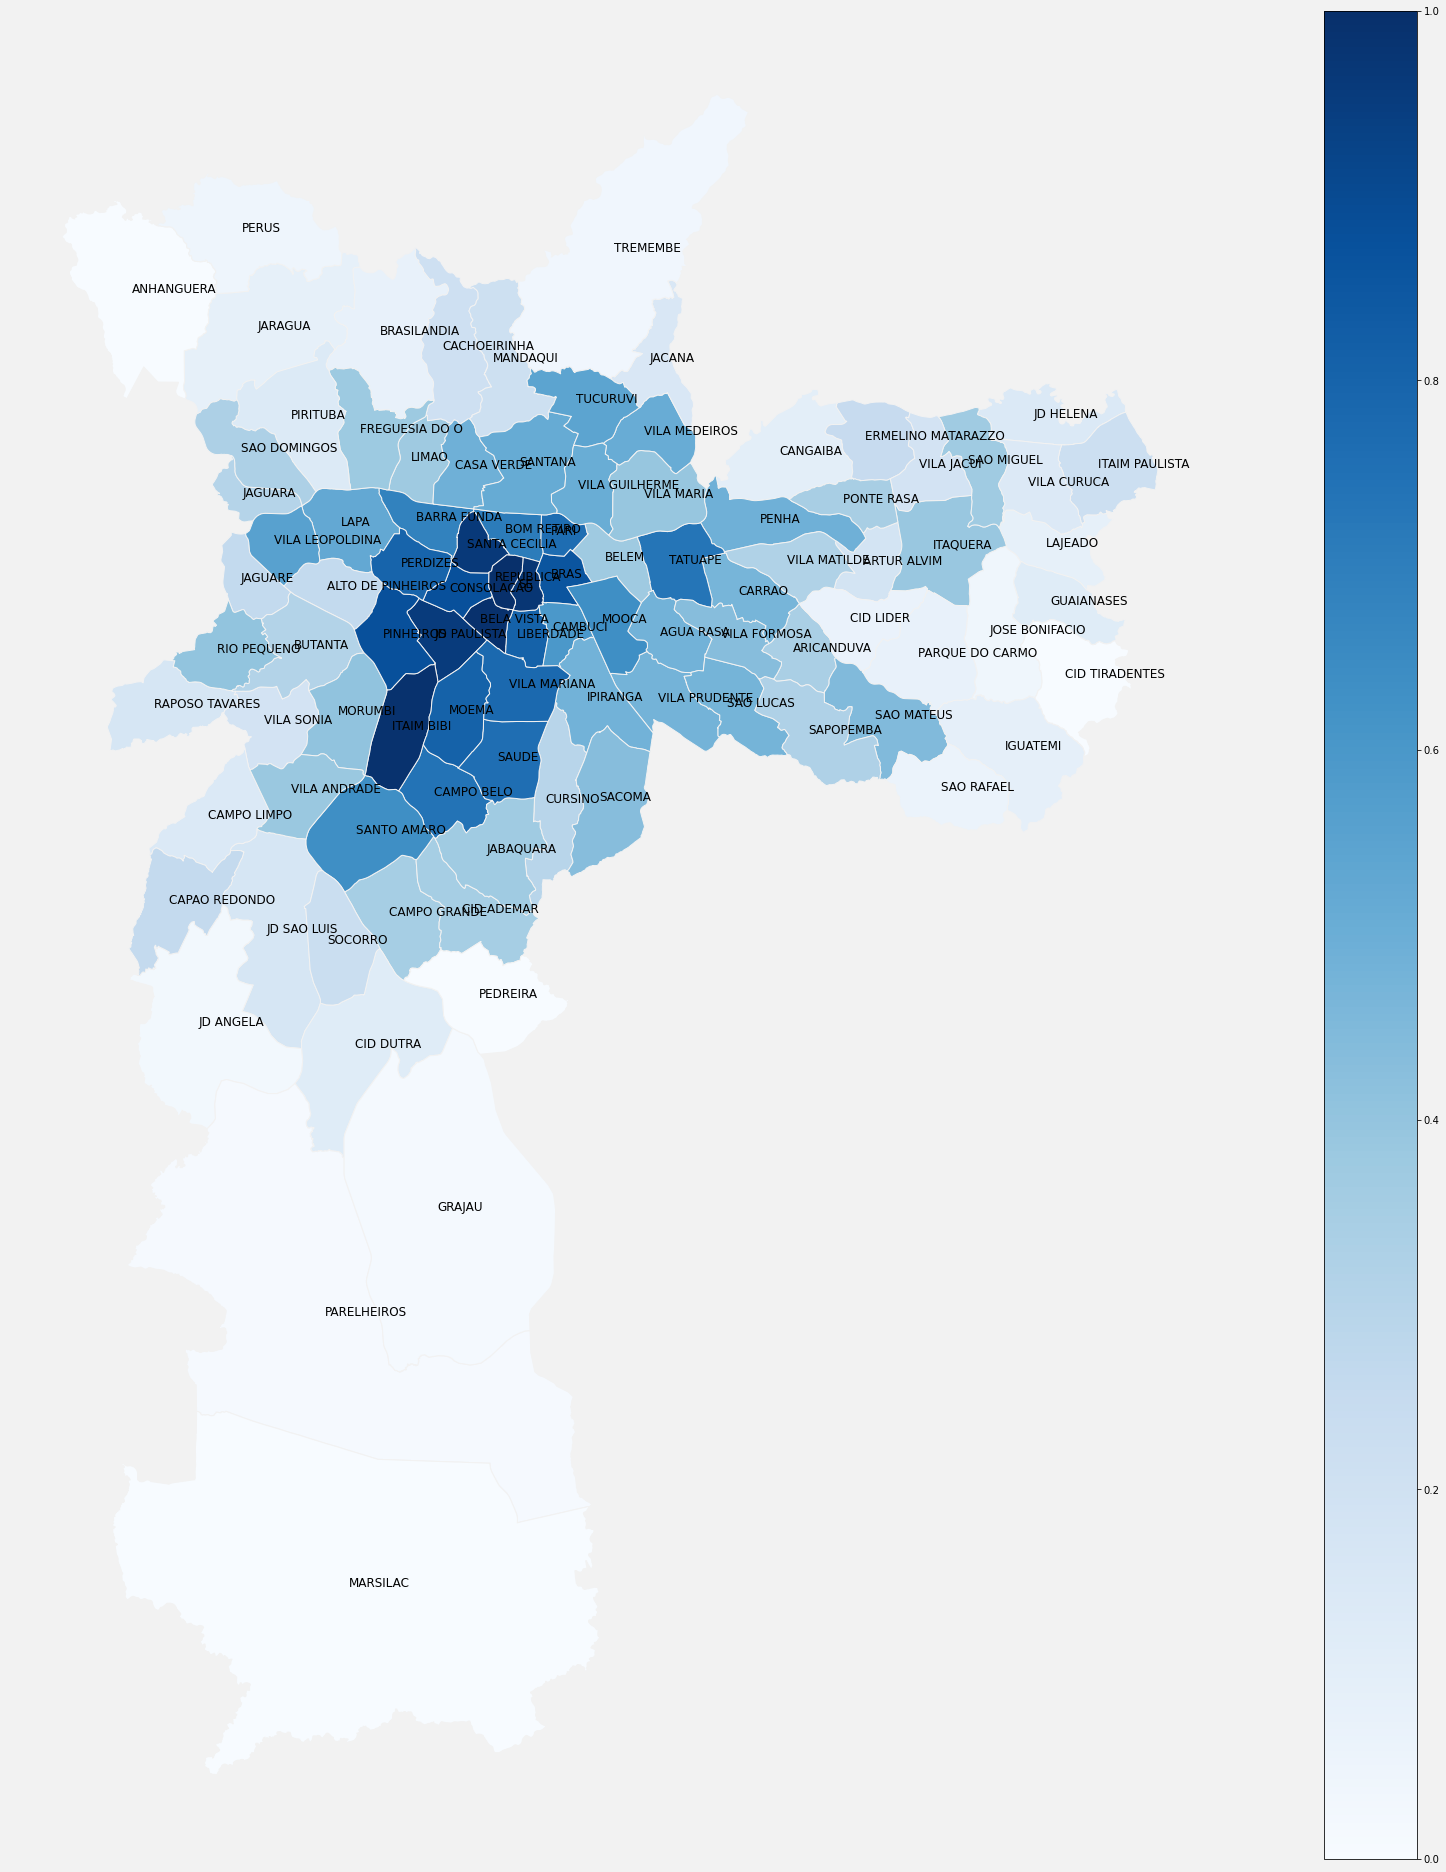

In [13]:
fig, ax = plt.subplots(figsize=(40,34))

# Set bg colors
ax.set(facecolor = "white")
fig.patch.set_facecolor('#f2f2f2')

# Plot
sp_shp_agg.plot(column='perc_atendimento', cmap="Blues", legend=True, ax=ax, edgecolor='#f2f2f2')

# Add district name
for x, y, label in zip(sp_shp_agg.centroid.x, sp_shp_agg.centroid.y, sp_shp_agg.nome_distrito):
  ax.annotate(label, xy=(x, y), xytext=(-10, 0), textcoords="offset points", fontsize=12)

ax.axis("off")
plt.show()